# Customer Churn Prediction Using Artificial Neural Network (ANN)



### **Business Understanding**

**Project Title**: Neural Network for Binary Classification

**Business Problem**:

In many industries, predictive models are employed to classify data into two categories, such as determining whether a customer will churn or predicting whether an email is spam or not. The objective of this project is to build and evaluate a neural network model that can be applied to real-world binary classification problems, such as customer behavior prediction, fraud detection, or medical diagnosis.

**Use Case**:

The neural network model is designed to take a set of features (input variables) and classify them into one of two classes. For example, this model could be used to:
- Predict whether a customer will purchase a product (yes/no).
- Determine if an email is spam or not.
- Identify if a medical test result is positive or negative.

**Data**:

We use historical data with 26 input features that help make the binary classification. The data set is divided into training and testing sets to evaluate the model's performance.

---

### **Objective**

The primary objective of this project is to build and train a neural network model to classify input data into two categories (binary classification). The model will be trained using a training dataset and validated using a validation set to monitor its performance across multiple epochs.

**Specific Goals**:

1. **Model Architecture**: Design and build a neural network with one hidden layer.
2. **Model Training**: Train the model on the training data, using binary cross-entropy as the loss function and accuracy as the evaluation metric.
3. **Model Evaluation**: Use the validation data to track the model’s performance during training (via accuracy and loss).
4. **Visualization**: Visualize the  data to understand how its structured.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")


In [2]:
# load dataset and display the first 3 rows
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
# drop customerID column as it is of no use
df.drop('customerID', axis='columns', inplace=True)

In [4]:
# get the structure and information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
#Find rows where 'TotalCharges' is missing
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
# Display rows where TotalCharges is missing
df.iloc[488]['TotalCharges']

' '

In [7]:
#Drop the rows where 'TotalCharges' is blank
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
#converting the totalcharge  column to a numeric one
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [9]:
# Verify the data type of the 'TotalCharges' column
df1.TotalCharges.dtypes

dtype('float64')

#### Data Visualization

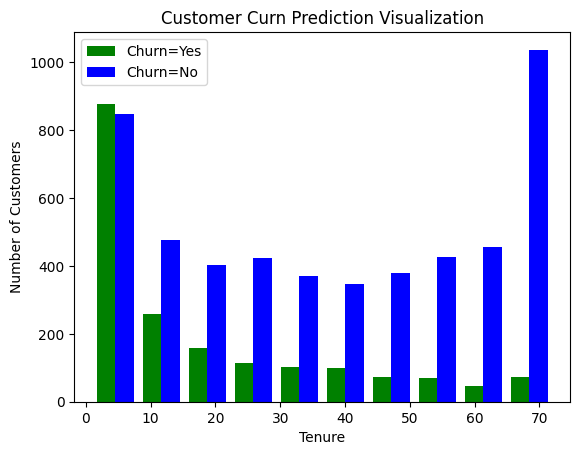

In [10]:
# Extract the tenure of customers who did not churn and those who churned
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

# Plot the tenure distribution for churned and non-churned customers
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title('Customer Curn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no],color=['green','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()


Observed above that the majority of people who are with the company for a long time are not living.

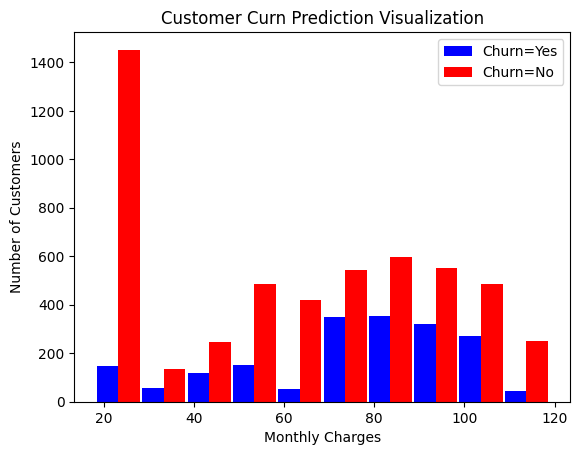

In [11]:
# Extract the monthly charges for customers who did not churn and those who churned
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

# Plot the monthly charges distribution for churned and non-churned customers
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title('Customer Curn Prediction Visualization')


blood_sugar_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women = [67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes, mc_churn_no],rwidth=0.95, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


customer who have very high charges are living more 

##### Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [12]:
# # Define a function to print unique values in non-numeric columns 
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')
            
# Print unique values in non-numeric columns            
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


##### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [13]:
#replace the multiplelines column the 'No phone service' entry with 'No'
df1.replace('No phone service', 'No', inplace=True)
#replace the OnlineSecurity,StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineBackup columns the 'No internet service' entry with 'No'
df1.replace('No internet service', 'No', inplace=True)

#view the non_numeric columns now
print_unique_col_values(df1)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


##### Convert Yes and No to 1 or 0

In [14]:
#replace yes and no entrys in the columns to numeric data i.e 1 and 0
yes_no_columns = ['PaperlessBilling','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','DeviceProtection',
                  'MultipleLines','StreamingTV','StreamingMovies', 'Partner', 'Dependents', 'PhoneService' ,'Churn','MultipleLines' ]

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No':0},inplace=True)

#viewing all the cuniques columns 
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [15]:
# replace the gender columnb male or female entries with 1 and 0
df1['gender'].replace({'Female': 1,'Male':0},inplace=True)

##### One Hot Encoding for categorical columns

In [16]:
# Perform one-hot encoding for categorical columns such as 'InternetService', 'Contract', and 'PaymentMethod'
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

# Display the new columns after one-hot encoding
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6951,0,0,0,0,49,1,0,0,0,0,...,False,False,True,False,False,True,False,True,False,False
6276,1,0,1,1,15,1,0,0,0,0,...,False,False,True,False,True,False,False,True,False,False
3849,1,0,1,0,58,1,1,1,1,1,...,False,True,False,False,False,True,True,False,False,False
2829,0,1,0,0,8,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [18]:
# Check the data types of the columns in the new dataframe
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [19]:
#Converting the bool columns to numeric onces

bool_columns = [

    'InternetService_DSL',
    'InternetService_Fiber optic',
    'InternetService_No',
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',
]

# Convert bool columns to numeric (int)
df2[bool_columns] = df2[bool_columns].astype(int)

# Verify the conversion
print(df2.dtypes)


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

##### Scaling

Scaling the numerical clumns that are no in the 0 and 1 range


In [20]:
# Scaling the numerical columns to the range [0, 1] using MinMaxScaler
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])



In [21]:
# Check the scaled data
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
702,0,0,0,0,0.394366,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6535,0,0,0,0,0.478873,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
3968,1,0,1,0,1.000000,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


#### Train, Test, Split

In [22]:
## Split the dataset into features (X) and target (y)
X=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [23]:
# Perform train-test split (80% training data, 20% testing data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [24]:
# Check the shape of the training data
X_train.shape

(5625, 26)

In [25]:
X_test.shape

(1407, 26)

#### Build a model (ANN) in tensorflow/keras

In [26]:
import tensorflow as tf
from tensorflow import keras

In [48]:
#creating a nueral network

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
    
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs= 100, validation_split=0.2)

Epoch 1/100
141/141 [==============================] - 2s 7ms/step - loss: 0.5050 - accuracy: 0.7502 - val_loss: 0.4562 - val_accuracy: 0.7769
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.7987 - val_loss: 0.4356 - val_accuracy: 0.7884
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.8062 - val_loss: 0.4314 - val_accuracy: 0.7884
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4111 - accuracy: 0.8080 - val_loss: 0.4306 - val_accuracy: 0.7893
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8091 - val_loss: 0.4301 - val_accuracy: 0.7929
Epoch 6/100
141/141 [==============================] - 1s 7ms/step - loss: 0.4081 - accuracy: 0.8104 - val_loss: 0.4298 - val_accuracy: 0.7893
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4068 - accuracy: 0.8093 - val_loss: 0.4308 - val_accuracy: 0.7902

In [28]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.7889


[0.4489832818508148, 0.7889125943183899]

In [29]:
#predict
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.1522174 ],
       [0.38947836],
       [0.01074737],
       [0.80201876],
       [0.52396697]], dtype=float32)

In [30]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [31]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [32]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [33]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

44/44 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7889
Test Accuracy: 0.79


#### Visualizing the Training History 
You can visualize the training and validation accuracy/loss to understand the model's performance over epochs:



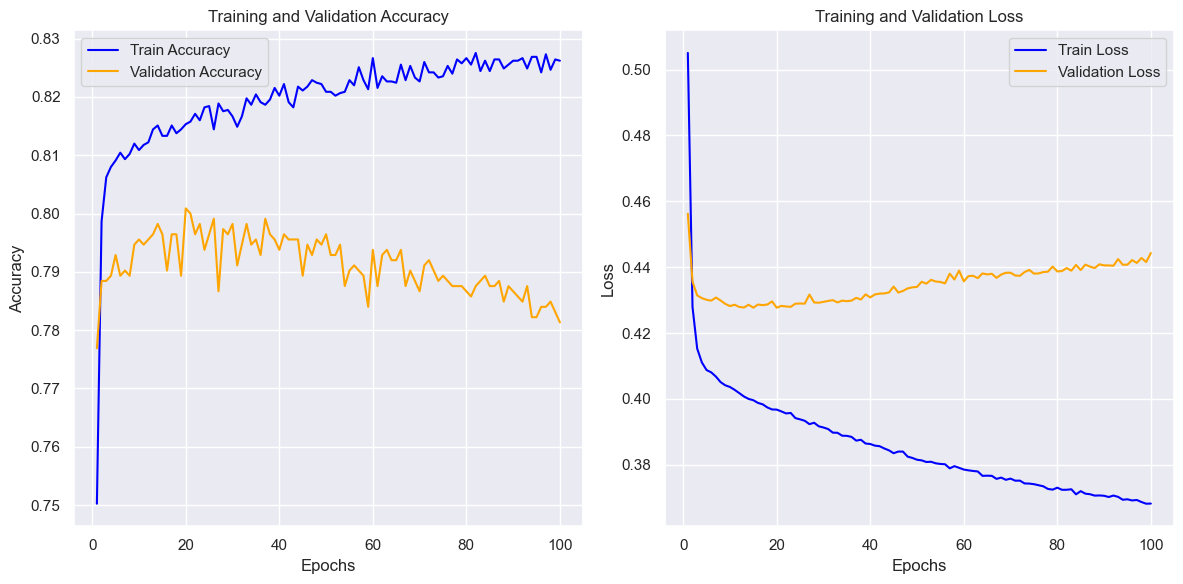

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style for better visuals
sns.set(style="darkgrid")

# Visualizing the training and validation accuracy using seaborn
plt.figure(figsize=(12, 6))

# Accuracy plot using seaborn
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, 101), y=history.history['accuracy'], label='Train Accuracy', color='blue')
sns.lineplot(x=range(1, 101), y=history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot using seaborn
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, 101), y=history.history['loss'], label='Train Loss', color='blue')
sns.lineplot(x=range(1, 101), y=history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [34]:
#Classification report

from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.68      0.51      0.58       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



tf.Tensor(
[[902  97]
 [200 208]], shape=(2, 2), dtype=int32)


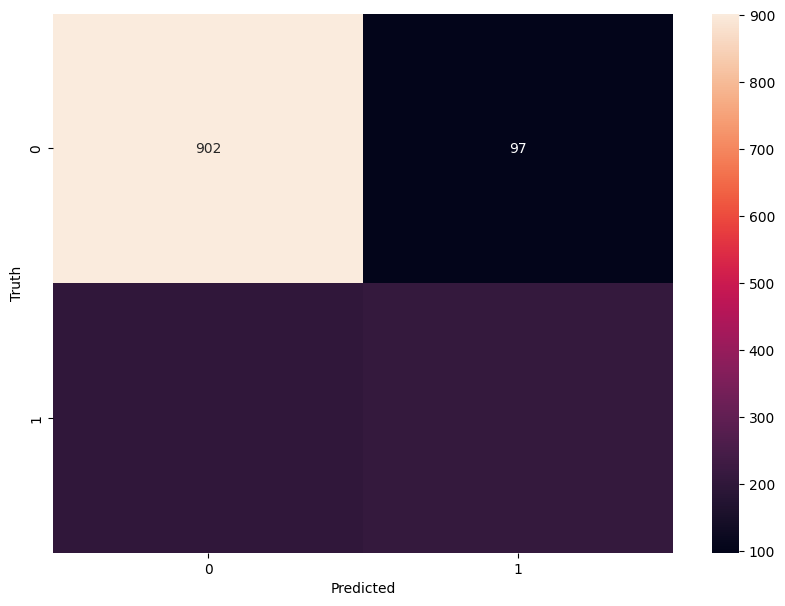

In [35]:
import seaborn as sn 
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_pred)


plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(cm)


##### Accuracy

In [36]:
round((886+216)/(886+216+113+192),2)

0.78

##### Precision for the 0 class. i.e. Precision for customers who did not churn

In [37]:
round(886/(886+192),2)

0.82

##### Precision for 1 class. i.e. Precision for customers who did acctually did churn


In [38]:
round(216/(216+113),2)

0.66

##### Recall for 0 class

In [39]:
round(886/(886+113),2)

0.89

##### Recall for 1 class

In [40]:
round(216/(216+192),2)

0.53

Saving the model

In [41]:
import pickle

In [42]:
filename = 'trained_model.sav'
pickle.dump(yp, open(filename, 'wb'))

In [43]:
#loading the saved model
loaded_model = pickle.load(open("trained_model.sav", 'rb'))